In [ ]:
from keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/test'

In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights

resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/train/*')

In [ ]:
folders

['/content/drive/MyDrive/train/Covid-19',
 '/content/drive/MyDrive/train/No_findings',
 '/content/drive/MyDrive/train/Pneumonia']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet50.output)

In [ ]:
len(folders)

3

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = image.ImageDataGenerator(
rescale=1./255,
shear_range= 0.2,
zoom_range= 0.2,
horizontal_flip = True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(224,224),
    batch_size= 32,
    class_mode= 'categorical')

Found 967 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Covid-19': 0, 'No_findings': 1, 'Pneumonia': 2}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
        '/content/drive/MyDrive/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 158 images belonging to 3 classes.


In [ ]:
hist = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/20
31/31 [==============================] - 491s 16s/step - loss: 2.1422 - accuracy: 0.4560 - val_loss: 5.0721 - val_accuracy: 0.3101
Epoch 2/20
31/31 [==============================] - 173s 6s/step - loss: 1.1124 - accuracy: 0.5357 - val_loss: 1.9389 - val_accuracy: 0.4557
Epoch 3/20
31/31 [==============================] - 174s 6s/step - loss: 0.9069 - accuracy: 0.5698 - val_loss: 2.5960 - val_accuracy: 0.3734
Epoch 4/20
31/31 [==============================] - 173s 6s/step - loss: 1.0014 - accuracy: 0.5388 - val_loss: 1.0444 - val_accuracy: 0.3291
Epoch 5/20
31/31 [==============================] - 173s 6s/step - loss: 0.9959 - accuracy: 0.5822 - val_loss: 1.4454 - val_accuracy: 0.3797
Epoch 6/20
31/31 [==============================] - 173s 6s/step - loss: 0.9033 - accuracy: 0.5636 - val_loss: 1.1168 - val_accuracy: 0.4620
Epoch 7/20
31/31 [==============================] - 173s 6s/step - loss: 0.9816 - accuracy: 0.5646 - val_loss: 0.8901 - val_accuracy: 0.4873
Epoch 8/20
3

In [ ]:
import matplotlib.pyplot as plt

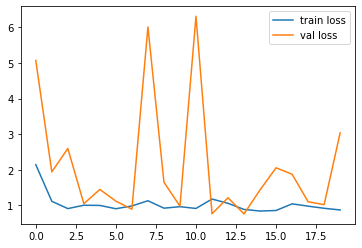

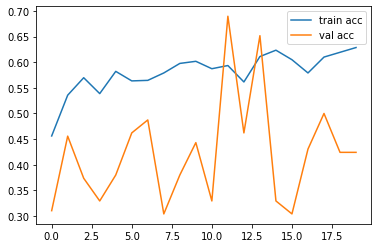

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
y_pred = model.predict(validation_generator)

In [ ]:
y_pred

array([[3.81107267e-04, 6.07009567e-02, 9.38917875e-01],
       [2.80400366e-03, 1.31590262e-01, 8.65605772e-01],
       [1.11242451e-04, 2.20673114e-01, 7.79215634e-01],
       [4.84477641e-05, 7.14396477e-01, 2.85555065e-01],
       [5.18134469e-03, 7.44748041e-02, 9.20343816e-01],
       [3.41998599e-03, 4.24800143e-02, 9.54100072e-01],
       [3.03945213e-04, 2.32436419e-01, 7.67259657e-01],
       [1.27525174e-03, 1.15519218e-01, 8.83205473e-01],
       [8.54871818e-04, 3.34503241e-02, 9.65694785e-01],
       [1.14126007e-04, 1.10314280e-01, 8.89571607e-01],
       [5.22227213e-03, 1.18922248e-01, 8.75855565e-01],
       [4.80233575e-05, 1.36636183e-01, 8.63315761e-01],
       [3.22934968e-04, 5.78317285e-01, 4.21359777e-01],
       [1.21515746e-04, 2.11058334e-01, 7.88820088e-01],
       [1.57002200e-04, 3.86911511e-01, 6.12931550e-01],
       [3.23597196e-04, 4.43807721e-01, 5.55868626e-01],
       [7.50806415e-04, 5.13222329e-02, 9.47926998e-01],
       [4.14151000e-03, 2.11805

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2])

In [ ]:
label = validation_generator.classes

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_pred,label)
cf

array([[ 0,  0,  0],
       [ 9,  4,  8],
       [59, 36, 42]])

In [ ]:
import pandas as pd
exp_series = pd.Series(label)
pred_series = pd.Series(y_pred)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,1,2,All
Actual,,,
0,9,59,68
1,4,36,40
2,8,42,50
All,21,137,158


In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

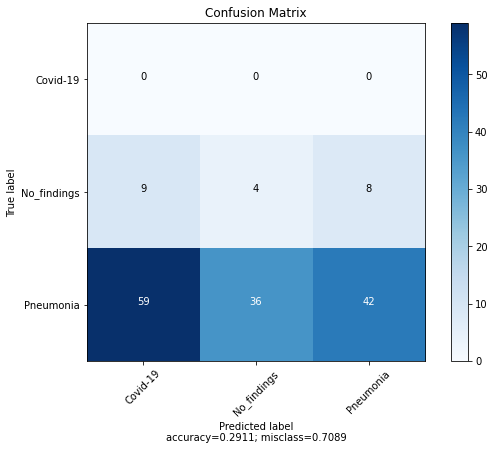

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 0,  0,   0],
                                              [  9,  4,  8],
                                              [  59,  36, 42]]), 
                      normalize    = False,
                      target_names = ['Covid-19', 'No_findings', 'Pneumonia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.10      0.19      0.13        21
           2       0.84      0.31      0.45       137

    accuracy                           0.29       158
   macro avg       0.31      0.17      0.19       158
weighted avg       0.74      0.29      0.41       158



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,label)

0.2911392405063291

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_pred, label, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.19047619, 0.30656934])

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_pred, label, average=None)

array([0.  , 0.1 , 0.84])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_pred, label, average=None)

array([0.        , 0.13114754, 0.44919786])